# Cyclistic Bike Analysis (google project) Coded By Python Pandas

#### **This is a Project provide by Google Data Analytics Professional Certificate**
**Google analytic program categorize the hole data analysis project into 6 phases:**

1.Ask

2.Prepare

3.Process 

4.Analyze

5.Share

6.Act

</BR>

### **Ask**:

</BR>

**1.Identify the business task:**

To design marketing strategies aimed at converting casual riders into annual members, since  annual membership will be more profitable than casual riders. 

 As a data analyst, my task is to identify Behavioral differences between annual members and casual riders using Cyclistic bikes. This is the first stage of compiling the business task, in the future, the data analyst team will proceed to the next stage: 
 
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

</BR>

**2.Consider key stakeholders:**

Main stakeholders:

* Lily Moreno: The director of marketing and my manager. By considering her role, it is best to perform a detailed analysis but as well clearly state the story behind the scene and provide suggestions. Since you can always connect with your manager and also she need your opinion for her decision.

Secondary stakeholders: 

* Cyclistic executive team: The notoriously detail-oriented executive team.

</BR>

### **Prepare:**

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis.

</BR>

**1.Credibility**

**Data located and organized**

Data is publicly released on amazon aws server, and organized with .csv files. We will use the newest 12 months data for analysis.

**Reliable:**

The data is very large and all the ride records are counted, therefore it is considerably reliable, however, some data missed certain attributes and is necessary to be cleaned

**Original:**

This is the first party information generated by the data team, it is indeed original.

**Comprehensive:** 

Some of the data missing certain attributes value and needed further process, it is not completely comprehensive. 

**Current:**

On Amazon AWS server, the latest 12 months data is provided, hence it is relevant. 

**Cited:**

Data is clearly cited by Motivate International Inc, and  [license](https://ride.divvybikes.com/data-license-agreement) provided.

</BR>

**2. Sort and filter Data:**

To sort and filter data, we first need to integrate data, and perform further investigation 

In [1]:
# Load packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from haversine import haversine

In [2]:
# Import Dataset

os.chdir(r"F:\Temp project1\trip_data_2022")
os.listdir()
data_2022_01 = pd.read_csv('202201_tripdata.csv')
data_2022_02 = pd.read_csv('202202_tripdata.csv')
data_2022_03 = pd.read_csv('202203_tripdata.csv')
data_2022_04 = pd.read_csv('202204_tripdata.csv')
data_2022_05 = pd.read_csv('202205_tripdata.csv')
data_2022_06 = pd.read_csv('202206_tripdata.csv')
data_2022_07 = pd.read_csv('202207_tripdata.csv')
data_2022_08 = pd.read_csv('202208_tripdata.csv')
data_2022_09 = pd.read_csv('202209_tripdata.csv')
data_2022_10 = pd.read_csv('202210_tripdata.csv')
data_2022_11 = pd.read_csv('202211_tripdata.csv')
data_2022_12 = pd.read_csv('202212_tripdata.csv')


In [3]:
#check one of the dataframe
data_2022_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             181806 non-null  object 
 1   rideable_type       181806 non-null  object 
 2   started_at          181806 non-null  object 
 3   ended_at            181806 non-null  object 
 4   start_station_name  152523 non-null  object 
 5   start_station_id    152523 non-null  object 
 6   end_station_name    150648 non-null  object 
 7   end_station_id      150648 non-null  object 
 8   start_lat           181806 non-null  float64
 9   start_lng           181806 non-null  float64
 10  end_lat             181678 non-null  float64
 11  end_lng             181678 non-null  float64
 12  member_casual       181806 non-null  object 
dtypes: float64(4), object(9)
memory usage: 18.0+ MB


There are 13 columns consists of **double** and **character** datatypes. started_at attribute
is a very important indicator to distinguish the behavioral difference between annual member and
causal riders, and could be converted and extracted into other time stamps. Member_casual column 
stated the rider type, and it is essential to the analysis.

</BR>

### **Process**

</BR>

**1.Tool used**

R is the only tool used in the project, since it is important to perform the analysis within
one platform for consistency.

</BR>

**2.Clean Data**

A function is created to insure the length/names/datatypes of columns in all datasets are aligned
with each other, then check columns between datasets

In [4]:
#Write a function to make sure all the columns between 2 dataframes are fully alligned.

def check_col(x,y):
    if len(list(x)) != len(list(y)):
        print("1st has diff col length than 2nd")
        return
    for i in range(len(list(x))):
        if list(x)[i] != list(y)[i]:
            print("1st has diff col name than 2nd for {0} col".format
                  (i))
            return
        elif x.dtypes[i] != y.dtypes[i]:
            print("1st has diff dtype than 2nd for {0} col".format
                  (i))
            return
        else:
            print("checked {}th col".format(i),sep=' ', end=' ', flush=True)
            
    print("ALL COLS ARE ALLIGNED")
    return
        
check_col(data_2022_01, data_2022_02)
check_col(data_2022_01, data_2022_03)
check_col(data_2022_01, data_2022_04)
check_col(data_2022_01, data_2022_05)
check_col(data_2022_01, data_2022_06)
check_col(data_2022_01, data_2022_07)
check_col(data_2022_01, data_2022_08)
check_col(data_2022_01, data_2022_09)
check_col(data_2022_01, data_2022_10)
check_col(data_2022_01, data_2022_11)
check_col(data_2022_01, data_2022_12)

checked 0th col checked 1th col checked 2th col checked 3th col checked 4th col checked 5th col checked 6th col checked 7th col checked 8th col checked 9th col checked 10th col checked 11th col checked 12th col ALL COLS ARE ALLIGNED
checked 0th col checked 1th col checked 2th col checked 3th col checked 4th col checked 5th col checked 6th col checked 7th col checked 8th col checked 9th col checked 10th col checked 11th col checked 12th col ALL COLS ARE ALLIGNED
checked 0th col checked 1th col checked 2th col checked 3th col checked 4th col checked 5th col checked 6th col checked 7th col checked 8th col checked 9th col checked 10th col checked 11th col checked 12th col ALL COLS ARE ALLIGNED
checked 0th col checked 1th col checked 2th col checked 3th col checked 4th col checked 5th col checked 6th col checked 7th col checked 8th col checked 9th col checked 10th col checked 11th col checked 12th col ALL COLS ARE ALLIGNED
checked 0th col checked 1th col checked 2th col checked 3th col chec

After checking column are aligned among all the dataset, we are able to combine them and remove
the row data.

In [5]:
#bind all the data in previous 12 months in to union_data_frame
union_data_frame = pd.concat([data_2022_01, data_2022_02, data_2022_03,
                              data_2022_04, data_2022_05, data_2022_06,
                              data_2022_07, data_2022_08, data_2022_09,
                              data_2022_10, data_2022_11, data_2022_12],
                             ignore_index=True)

# remove row data
del [data_2022_01, data_2022_02, data_2022_03,
     data_2022_04, data_2022_05, data_2022_06,
     data_2022_07, data_2022_08, data_2022_09,
     data_2022_10, data_2022_11, data_2022_12] 

In [6]:
#Check combined Dataframe info
union_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


A unified dataset was formed, the next step is to clean, reframe, and create additional
information through the data.

In [7]:
# extract Year from started_at column
union_data_frame["started_at_year"] = pd.to_datetime(
    union_data_frame["started_at"]).dt.year.astype("int16")

# extract Month from started_at column
union_data_frame["started_at_month"] = pd.to_datetime(
    union_data_frame["started_at"]).dt.month.astype("int16")

# extract Day from started_at column
union_data_frame["started_at_day"] = pd.to_datetime(
    union_data_frame["started_at"]).dt.day.astype("int16")

# compute day of week from started_at column
union_data_frame["day_of_week"] = pd.to_datetime(
    union_data_frame["started_at"]).dt.day_name().str[0:3]

# set order to the day_of_week column, since it was originally present by string, ordered by
# alphabetical order
union_data_frame["day_of_week"] = pd.Categorical(union_data_frame["day_of_week"],
                                                 ordered = True,
                                                 categories = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])

# extract Hour of day from started_at column
union_data_frame["started_at_hour"] = pd.to_datetime(
    union_data_frame["started_at"]).dt.strftime("%H").astype("int16")

# extract Hour of day from ended_at column
union_data_frame["ended_at_hour"] = pd.to_datetime(
    union_data_frame["ended_at"]).dt.strftime("%H").astype("int16")

# compute ride time using ended_at and started_at columns
union_data_frame["ride_length_mins"] = (pd.to_datetime(union_data_frame.ended_at) - 
                                        pd.to_datetime(union_data_frame.started_at)
                                        ).astype("timedelta64[s]")/60

# get if it is rounded trip, but consider blank values in station_name and assigned as -1                                            
union_data_frame["round_trip"] = np.where((~union_data_frame["start_station_name"].isna()) & 
                                          (~union_data_frame["end_station_name"].isna()) & 
                                          (union_data_frame["end_station_name"] == 
                                           union_data_frame["start_station_name"]),
                                          1,
                                          np.where((union_data_frame["start_station_name"].isna()) &
                                                   (union_data_frame["end_station_name"].isna()),
                                                   -1,0))

# get ride distance by using haversine function and apply lambda row to calculte rowwise
union_data_frame["ride_distance"] = union_data_frame.apply(lambda row: 
                                                           haversine((row["start_lat"],row["start_lng"]), 
                                                                     (row["end_lat"],row["end_lng"])), 
                                                           axis=1) *1000
# set order of rideable type in alphabetical order    
union_data_frame["rideable_type"] = pd.Categorical(union_data_frame["rideable_type"],
                                                   ordered = True,
                                                   categories = ["classic_bike", "docked_bike", "electric_bike"])

#crate a processed dataset called data_processed
#Drop duplicate rows and rows with N/A value except station names and station codes
data_processed = union_data_frame.drop_duplicates()

data_processed = data_processed.dropna(subset = ['ride_id',
                                                 'rideable_type',
                                                 'started_at',
                                                 'ended_at',
                                                 'start_lat',
                                                 'start_lng',
                                                 'end_lat',
                                                 'end_lng',
                                                 'member_casual',
                                                 'started_at_year',
                                                 'started_at_month',
                                                 'started_at_day',
                                                 'day_of_week',
                                                 'started_at_hour',
                                                 'ended_at_hour',
                                                 'ride_length_mins',
                                                 'round_trip',
                                                 'ride_distance'],
                                       how = "any")

#Access data frames to see any extreme values
a = data_processed[data_processed.isnull().any(axis=1)]
b = data_processed[~data_processed["end_station_name"].isna()]

after filtering data to show its maximum value for all columns, 
We see there are extreme cases in the dataset for the ride time, therefore we restrict the ride time length to be positive and less then 1 day (1440 mins)

Another issued occurred when filtering the data, extremely long ride distances were cause by stating LNG and LAT as 0, thus remove LNG and Lat with value of 0, and remove all trips longer then 100 Km:

In [8]:
data_processed = data_processed[(data_processed["ride_length_mins"] > 0) &
                                (data_processed["ride_length_mins"] < 1440)]

data_processed = data_processed[(data_processed["end_lat"] != 0) &
                                (data_processed["end_lng"] != 0)]

data_processed = data_processed[(data_processed["start_lat"] != 0) &
                                (data_processed["start_lng"] != 0)]


data_processed = data_processed[(data_processed["ride_distance"] < 100000)]

By the stage of process, we provide cleaned/organize/manipulable data with ability to perform further analysis.

</BR>

### **Analyze**

**after Cleaning data and replenished useful information, analysis is ready to launch.**

</BR>

**1.getting to know the big picture:**

It is essential to acknowledge the overall distribution of the riders. By computing and illustrate

  * Percentage of user type
  * Distribution of Ride Vehicle 
  * Overall ride time and ride distance among member and casual riders
 
We will gain a big picture of the current situation and perform further analysis.

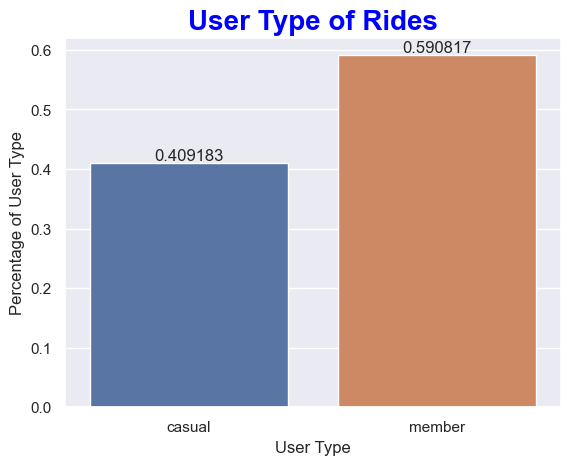

In [9]:
#Calculate User percentage base on count of the rides

analysis_User_type_perc = data_processed.groupby("member_casual",
                                                 as_index = False)["round_trip"].count()

analysis_User_type_perc = analysis_User_type_perc.rename(columns = {"round_trip" : "count"})


analysis_User_type_perc["perc"] = analysis_User_type_perc["count"] / (analysis_User_type_perc["count"].sum())


analysis_User_type_perc.dtypes

sns.set_theme(style="darkgrid")
g1 = sns.barplot(data = analysis_User_type_perc, x = "member_casual", y = "perc")
g1.bar_label(g1.containers[0])


g1.set_xlabel("User Type")
g1.set_ylabel("Percentage of User Type")
g1.set_title("User Type of Rides", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show()

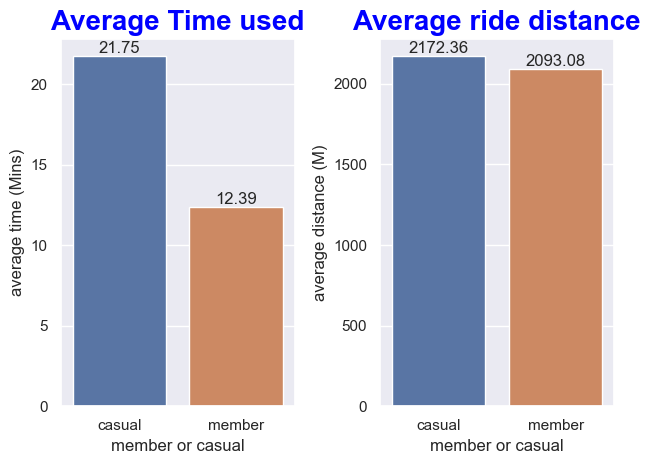

In [10]:
#Compute average distance and time among User types

analysis_ride_dist_time = data_processed.groupby("member_casual",
                                                 as_index = False)[["ride_distance",
                                                                    "ride_length_mins"]].mean().round(2)

analysis_ride_dist_time.columns = ["member_casual", "mean_dist", "mean_time"]



plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.autolayout"] = True

f, axe = plt.subplots(1,2)
g2 = sns.barplot(data = analysis_ride_dist_time, x = "member_casual", y = "mean_time", ax = axe[0])
g2.bar_label(g2.containers[0])
g2.set_xlabel("member or casual")
g2.set_ylabel("average time (Mins)")
g2.set_title("Average Time used", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
 
g3 = sns.barplot(data = analysis_ride_dist_time, x = "member_casual", y = "mean_dist", ax = axe[1])
g3.bar_label(g3.containers[0])
g3.set_xlabel("member or casual")
g3.set_ylabel("average distance (M)")
g3.set_title("Average ride distance", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

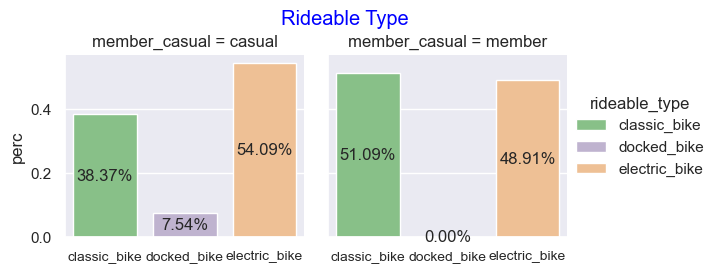

In [11]:
#Calculate Ride type

analysis_ride_type_perc = data_processed.groupby(["member_casual" , "rideable_type"],
                                                 as_index = False)["round_trip"].count()

analysis_ride_type_perc["sum"] = (analysis_ride_type_perc.groupby("member_casual",
                                                          as_index = False)["round_trip"].transform(sum))

analysis_ride_type_perc["perc"] =(analysis_ride_type_perc["round_trip"] / analysis_ride_type_perc["sum"]).round(4)

analysis_ride_type_perc = analysis_ride_type_perc.rename(columns = {"round_trip" : "count"})

analysis_ride_type_perc = analysis_ride_type_perc.drop(columns = ["count","sum"])


g4 = sns.FacetGrid(data = analysis_ride_type_perc, col= "member_casual" , hue = "rideable_type", palette="Accent")
g4.map(sns.barplot, "rideable_type" , "perc",
       order = list(analysis_ride_type_perc["rideable_type"].unique()) ).add_legend()
for ax in g4.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()/2),
                ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')
g4.set_xticklabels( size = 10)
g4.set_xlabels("")
g4.figure.subplots_adjust(top=0.83)
g4.fig.suptitle("Rideable Type", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

</BR>

**Analysis:**

* Overall user percentage: 
  + The graph illustrated there are roughly 41 percent of casual riders, meaning the potential of conversion from casual to membership is high, reveals a good of potential of growth even the company don't expend the overall customer size.

* Overall ride ride time and distance: 
  + The average riding time of Causal riders is around 22 minutes, almost 2 times then the member riders, 12 minutes. However, the distance didn't infer the difference, the different of ride distance is within 5 percent. May cause by speed or riding style.

* Overall rideable type: 
  + Casual riders have the highest percentage usage of electric bikes, meanwhile the usage of different bike by membership are nearly identical. It is interesting that member riders don't have any usage of docked bike.
  
</BR>

**From analyzing the graphs, we can infer a large convertible casual riders may have different purposes using the bicycle, for the further analysis, we need to bring these questions:**

  * What are the trends and flow of user behavior which may varies from casual and members, or anything in common?
  
  * what are the mutual and exclusive purpose of using the bicycle among casual and members.
  
  * Are we able to address conclusions by the evidence from the analysis?

</BR>

**2.identify trends and flow of the users**

By analyzing the trend and flow to seek mutual and exclusive behavior among users, we will create graphs of:

  * ride numbers and ride time separated by months.
  
  * ride numbers and ride time separated by day of week.
  
  * ride numbers and ride time separated by hours in a day.

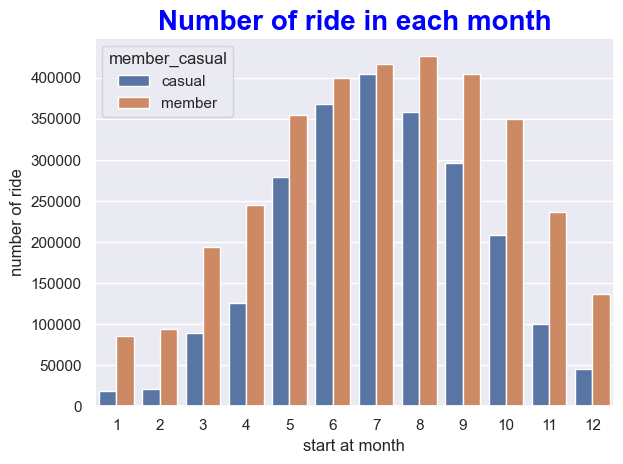

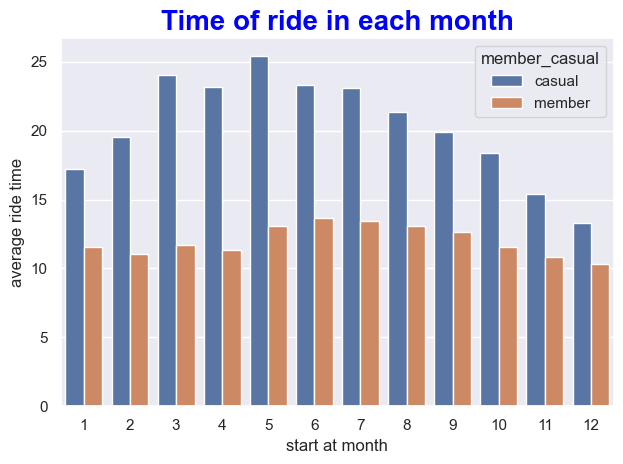

In [12]:
analysis_start_month = data_processed.groupby(["started_at_month","member_casual"],
                                              as_index = False).agg(
                                                  mean_ride_len = ("ride_length_mins", "mean"),
                                                  num_of_ride = ("ride_length_mins", "count"),
                                                  mean_distance = ("ride_distance", "mean")
                                                  )
                                                  

analysis_start_month.sort_values(by = ["member_casual","started_at_month"], inplace = True)

g5 = sns.barplot(data = analysis_start_month, x = "started_at_month", y = "num_of_ride", hue="member_casual")
g5.set_xlabel("start at month")
g5.set_ylabel("number of ride")
g5.set_title("Number of ride in each month", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

g6 = sns.barplot(data = analysis_start_month, x = "started_at_month", y = "mean_ride_len", hue="member_casual")
g6.set_xlabel("start at month")
g6.set_ylabel("average ride time")
g6.set_title("Time of ride in each month", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

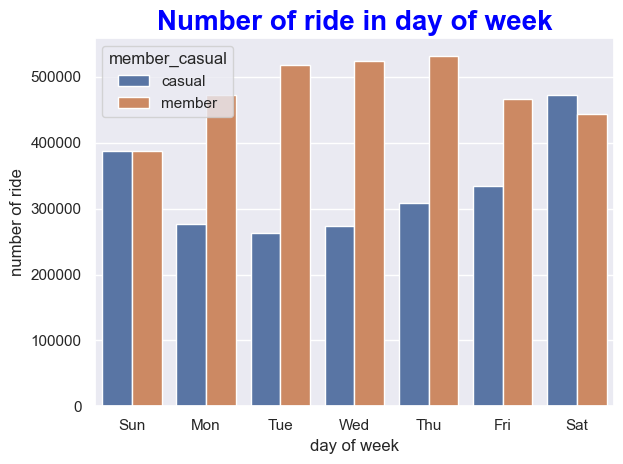

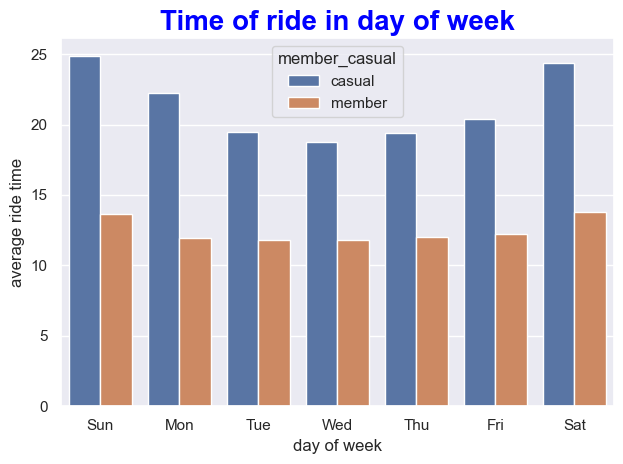

In [13]:
analysis_start_Wday = data_processed.groupby(["day_of_week","member_casual"],
                                              as_index = False).agg(
                                                  mean_ride_len = ("ride_length_mins", "mean"),
                                                  num_of_ride = ("ride_length_mins", "count"),
                                                  mean_distance = ("ride_distance", "mean")
                                                  )
    
analysis_start_Wday.sort_values(by = ["member_casual","day_of_week"], inplace = True) 
    
g7 = sns.barplot(data = analysis_start_Wday, x = "day_of_week", y = "num_of_ride", hue="member_casual")
g7.set_xlabel("day of week")
g7.set_ylabel("number of ride")
g7.set_title("Number of ride in day of week", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

g8 = sns.barplot(data = analysis_start_Wday, x = "day_of_week", y = "mean_ride_len", hue="member_casual")
g8.set_xlabel("day of week")
g8.set_ylabel("average ride time")
g8.set_title("Time of ride in day of week", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

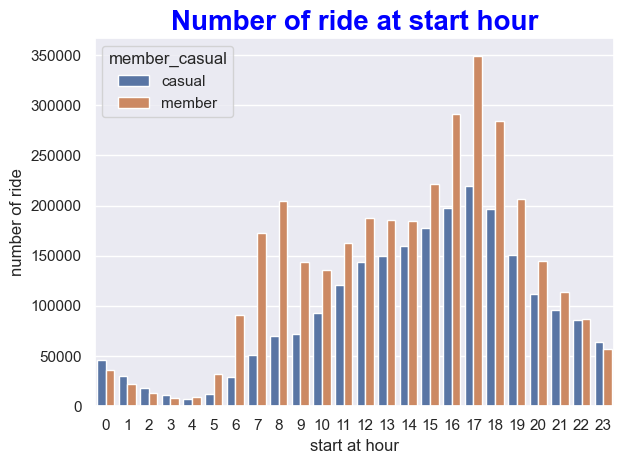

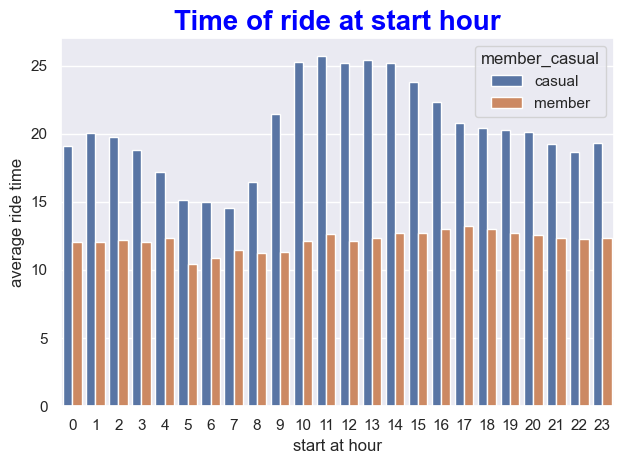

In [14]:
analysis_start_hour = data_processed.groupby(["started_at_hour","member_casual"],
                                              as_index = False).agg(
                                                  mean_ride_len = ("ride_length_mins", "mean"),
                                                  num_of_ride = ("ride_length_mins", "count"),
                                                  mean_distance = ("ride_distance", "mean")
                                                  )


analysis_start_hour.sort_values(by = ["member_casual","started_at_hour"], inplace = True)


g9 = sns.barplot(data = analysis_start_hour, x = "started_at_hour", y = "num_of_ride", hue="member_casual")
g9.set_xlabel("start at hour")
g9.set_ylabel("number of ride")
g9.set_title("Number of ride at start hour", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

g10 = sns.barplot(data = analysis_start_hour, x = "started_at_hour", y = "mean_ride_len", hue="member_casual")
g10.set_xlabel("start at hour")
g10.set_ylabel("average ride time")
g10.set_title("Time of ride at start hour", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

</BR>

**Analysis**

* Month analysis: 

  + For number of rides each months, both member and casual riders formed a normal distribution shape which topped at summer time, therefore the number of rides is sensitive to the weather. However, casual users are more sensitive to temp since the number dropped drastically in October, meaning that the necessity of bike is higher in member riders.
  
  + Compared to Casual users, member rider's ride time is more stable, inferring they may have fixed ride routes.

* Day of week analysis:

  + For member riders, their number of rides peaked in the weekdays, and less in the weekends, in contrast, more casual riders during weekends. The ride time of member shows stability that differentiate the causal riders.
  
* Hour analysis:

  + Member riders out-numbered the casual rider in 6-9 and 16-19 o clock, which are the time range of Commute time range.
  
  + A interest point shows that the ride time bottomed from 6-9 for casual user, meaning a very high percentage of casual riders used bicycle as commute vehicle during 6-9, and higher percentage for exercise and entertainment purposes at noon.
  
**By analyzing the graphs, we can infer the membership users are more leaning towards commute-use, causal users may have other major purpose such as exercise and entertainment, but as well have a decent percentage of commute-use**

  * Next, we will perform segmentation of purpose and gain some more insights.
  
</BR>

**3.segmentation analysis**

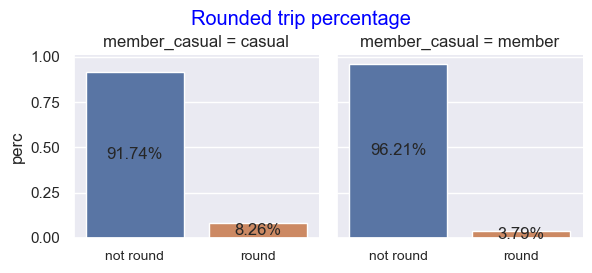

In [15]:
analysis_round_trip_perc = data_processed[data_processed["round_trip"] != -1]

analysis_round_trip_perc = analysis_round_trip_perc.groupby(["member_casual","round_trip"],
                                                            as_index = False).agg(
                                                                count = ("round_trip", "count")                                                                                                                     
                                                                )

analysis_round_trip_perc["perc"] = analysis_round_trip_perc.groupby("member_casual",
                                                            as_index = False)["count"].transform(
                                                                lambda x: x/x.sum()
                                                                )

analysis_round_trip_perc["round_trip"] = np.where(analysis_round_trip_perc["round_trip"] == 1,
                                                  "round","not round")                                                            


g11 = sns.FacetGrid(data = analysis_round_trip_perc , col = "member_casual", hue = "round_trip")
g11.map(sns.barplot, "round_trip", "perc", order  =
        list(analysis_round_trip_perc["round_trip"].unique()))
for ax in g11.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2.,
                                                p.get_height()/2), 
                ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')
    
g11.set_xticklabels( size = 10)
g11.set_xlabels("")
g11.figure.subplots_adjust(top=0.83)
g11.fig.suptitle("Rounded trip percentage", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1) 

Text(0.5, 1.0, 'Number of ride Vs. ride time between 4pm to 7pm')

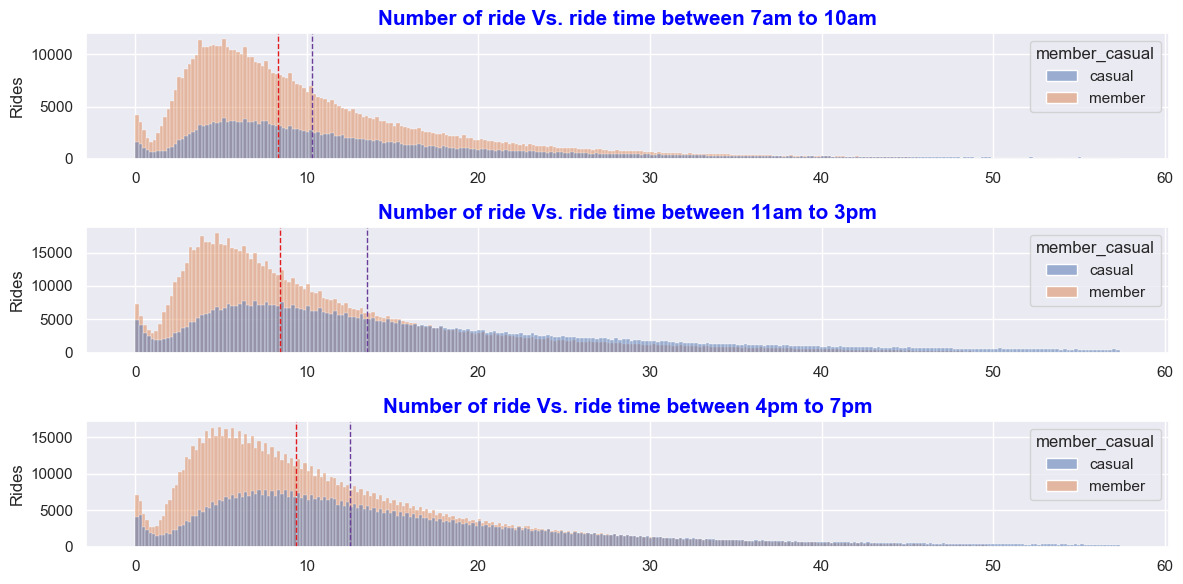

In [16]:
twoSd = 2 * (data_processed.ride_length_mins).std()


analysis_mor = data_processed[np.isin(data_processed["started_at_hour"], range(7,11)) &
                             (data_processed["ride_length_mins"] < twoSd)]

analysis_mor = analysis_mor.loc[:,["member_casual","started_at_hour", "ride_length_mins"]].sort_values(
    by = ["member_casual","started_at_hour"])
    
analysis_mor["average_time"] = analysis_mor.groupby("member_casual",
                                                    as_index = False)["ride_length_mins"].transform("median")
    
###### ######

analysis_noon = data_processed[np.isin(data_processed["started_at_hour"], range(11,16)) &
                             (data_processed["ride_length_mins"] < twoSd)]

analysis_noon = analysis_noon.loc[:,["member_casual","started_at_hour", "ride_length_mins"]].sort_values(
    by = ["member_casual","started_at_hour"])
    
analysis_noon["average_time"] = analysis_noon.groupby("member_casual",
                                                    as_index = False)["ride_length_mins"].transform("median")

###### ######

analysis_aft = data_processed[np.isin(data_processed["started_at_hour"], range(16,20)) &
                             (data_processed["ride_length_mins"] < twoSd)]

analysis_aft = analysis_aft.loc[:,["member_casual","started_at_hour", "ride_length_mins"]].sort_values(
    by = ["member_casual","started_at_hour"])
    
analysis_aft["average_time"] = analysis_aft.groupby("member_casual",
                                                    as_index = False)["ride_length_mins"].transform("median")



f, axe = plt.subplots(3,1, figsize = (12,6))
plt.rcParams["figure.autolayout"] = True
g12 = sns.histplot(data = analysis_mor, x = "ride_length_mins", hue="member_casual", ax = axe[0])
axe[0].axvline(analysis_mor["average_time"].min(), color = sns.color_palette("Paired")[5] , lw = 1, linestyle = "--")
axe[0].axvline(analysis_mor["average_time"].max(), color = sns.color_palette("Paired")[9] , lw = 1, linestyle = "--")
g12.set_xlabel("")
g12.set_ylabel("Rides")
g12.set_title("Number of ride Vs. ride time between 7am to 10am", 
              fontdict = {"size": 15, "color": "blue", "weight": "bold"})

g13 = sns.histplot(data = analysis_noon, x = "ride_length_mins", hue="member_casual", ax = axe[1])
axe[1].axvline(analysis_noon["average_time"].min(), color = sns.color_palette("Paired")[5] , lw = 1, linestyle = "--")
axe[1].axvline(analysis_noon["average_time"].max(), color = sns.color_palette("Paired")[9] , lw = 1, linestyle = "--")
g13.set_xlabel("")
g13.set_ylabel("Rides")
g13.set_title("Number of ride Vs. ride time between 11am to 3pm", 
              fontdict = {"size": 15, "color": "blue", "weight": "bold"})

g14 = sns.histplot(data = analysis_aft, x = "ride_length_mins", hue="member_casual", ax = axe[2])
axe[2].axvline(analysis_aft["average_time"].min(), color = sns.color_palette("Paired")[5] , lw = 1, linestyle = "--")
axe[2].axvline(analysis_aft["average_time"].max(), color = sns.color_palette("Paired")[9] , lw = 1, linestyle = "--")
g14.set_xlabel("")
g14.set_ylabel("Rides")
g14.set_title("Number of ride Vs. ride time between 4pm to 7pm", 
              fontdict = {"size": 15, "color": "blue", "weight": "bold"})

Text(0.5, 1.0, 'Number of ride Vs. ride time in weekend')

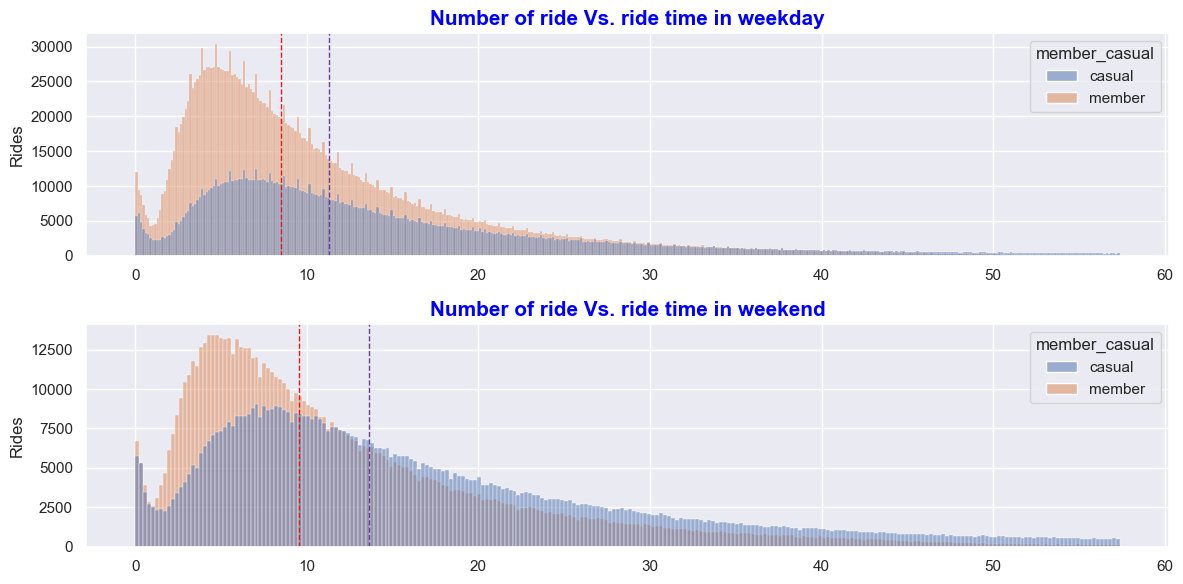

In [17]:
analysis_wday_line = data_processed[np.isin(data_processed["day_of_week"], ["Mon","Tue","Wed","Thu","Fri"]) &
                             (data_processed["ride_length_mins"] < twoSd)]

analysis_wday_line = analysis_wday_line.loc[:,["member_casual","day_of_week", "ride_length_mins"]].sort_values(
    by = ["member_casual","day_of_week"])
    
analysis_wday_line["average_time"] = analysis_wday_line.groupby("member_casual",
                                                    as_index = False)["ride_length_mins"].transform("median")

###### ######

analysis_wend_line = data_processed[np.isin(data_processed["day_of_week"], ["Sat","Sun"]) &
                             (data_processed["ride_length_mins"] < twoSd)]

analysis_wend_line = analysis_wend_line.loc[:,["member_casual","day_of_week", "ride_length_mins"]].sort_values(
    by = ["member_casual","day_of_week"])
    
analysis_wend_line["average_time"] = analysis_wend_line.groupby("member_casual",
                                                    as_index = False)["ride_length_mins"].transform("median")


f, axe = plt.subplots(2,1, figsize = (12,6))
plt.rcParams["figure.autolayout"] = True
g15 = sns.histplot(data = analysis_wday_line, x = "ride_length_mins", hue="member_casual", ax = axe[0])
axe[0].axvline(analysis_wday_line["average_time"].min(), color = sns.color_palette("Paired")[5] , lw = 1, linestyle = "--")
axe[0].axvline(analysis_wday_line["average_time"].max(), color = sns.color_palette("Paired")[9] , lw = 1, linestyle = "--")
g15.set_xlabel("")
g15.set_ylabel("Rides")
g15.set_title("Number of ride Vs. ride time in weekday", 
              fontdict = {"size": 15, "color": "blue", "weight": "bold"})

g16 = sns.histplot(data = analysis_wend_line, x = "ride_length_mins", hue="member_casual", ax = axe[1])
axe[1].axvline(analysis_wend_line["average_time"].min(), color = sns.color_palette("Paired")[5] , lw = 1, linestyle = "--")
axe[1].axvline(analysis_wend_line["average_time"].max(), color = sns.color_palette("Paired")[9] , lw = 1, linestyle = "--")
g16.set_xlabel("")
g16.set_ylabel("Rides")
g16.set_title("Number of ride Vs. ride time in weekend", 
              fontdict = {"size": 15, "color": "blue", "weight": "bold"})

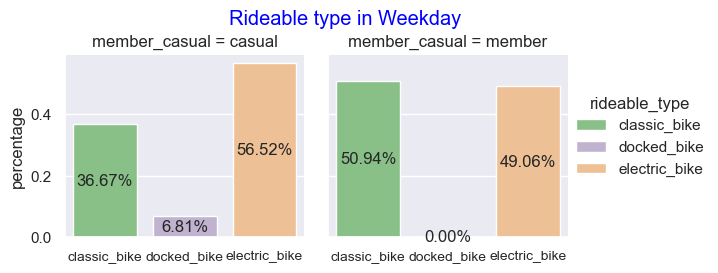

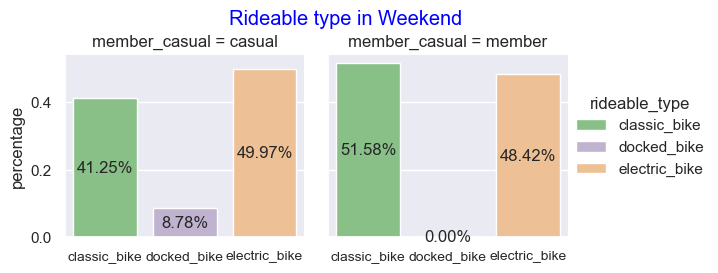

In [18]:
analysis_User_type_perc_wday = data_processed[np.isin(data_processed["day_of_week"], 
                                                      ["Mon","Tue","Wed","Thu","Fri"])].groupby(
                                                          ["member_casual","rideable_type"]).agg(
                                                              count = ("rideable_type", "count")
                                                              ).groupby("member_casual")["count"].transform(
                                                                            lambda x: x / x.sum()).rename("perc")
                                                             
analysis_User_type_perc_wday = analysis_User_type_perc_wday.reset_index()


###### ######

analysis_User_type_perc_wend = data_processed[np.isin(data_processed["day_of_week"], 
                                                      ["Sat","Sun"])].groupby(
                                                          ["member_casual","rideable_type"]).agg(
                                                              count = ("rideable_type", "count")
                                                              ).groupby("member_casual")["count"].transform(
                                                                            lambda x: x / x.sum()).rename("perc")

analysis_User_type_perc_wend = analysis_User_type_perc_wend.reset_index()



g17 = sns.FacetGrid(data = analysis_User_type_perc_wday, col= "member_casual" , hue = "rideable_type", palette="Accent")
g17.map(sns.barplot, "rideable_type" , "perc", 
       order = list(analysis_User_type_perc_wday["rideable_type"].unique()) ).add_legend()
for ax in g17.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')
g17.set_xticklabels( size = 10)
g17.set_xlabels("")
g17.set_ylabels("percentage")
g17.figure.subplots_adjust(top=0.83)
g17.fig.suptitle("Rideable type in Weekday", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1)

g18 = sns.FacetGrid(data = analysis_User_type_perc_wend, col= "member_casual" , hue = "rideable_type", palette="Accent")
g18.map(sns.barplot, "rideable_type" , "perc", 
       order = list(analysis_User_type_perc_wend["rideable_type"].unique()) ).add_legend()
for ax in g18.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')
g18.set_xticklabels( size = 10)
g18.set_xlabels("")
g18.set_ylabels("percentage")
g18.figure.subplots_adjust(top=0.83)
g18.fig.suptitle("Rideable type in Weekend", fontdict = {"size" : 20, "color": "blue", "weight": "bold"})
plt.show(1)

</BR>

**Analysis**

* Round trip analysis:

  + Casual riders have doubled the percentage of rounded trip than member riders, shows higher percentage of causal uses, however, it is less then 10 percent.
  
* Number of rides vs. ride time in hour ranges:

  + Among 3 graphs, casual rider's ride time always exceed the members', even in the morning, possibly the commute range is longer for casual riders. Gap of median between member and casual riders is biggest at noon, indicate more casual use for casual users out of commute time.
  
* Number of rides vs. ride time by day of week:

  + Also support the argument that casual use will take longer time then commute use.
  
* Rideable type by day of week:

  + It is very interesting that for causal user, the use of electric bike decreased nearly 6 percent at weekends. Assuming higher commute use in weekdays, the dramatic decrease of electric bike usage at weekend may indicate a longer distance of commute route, or it is too lazy for them to ride a classic bike for commute. 
  
**By analyzing the graph, it support the statement previously stated, and gained some insights for the behavior of causal rider for commute purpose.**

</BR>

### **Share**

</BR>

**By analyzing the data, some essential information is revealed**

  * High potential of profit gain from a large number of convertible causal rider 
  
  * Number of rides peaks in summer and low in winter, temperature sensitive.
  
  * Causal riders have higher percentage of Causal use, such as entertainment, tourism, and exercise. Member riders are more practical for commute uses.
  
  * Casual riders uses bikes less often for the morning commute, and are active at noon and afternoon. Member riders rides more in the morning, but follow the same pattern in the rest of day.
  
  * Casual riders uses electric bikes more, even in commute time.
  
</BR>
  
### **Act**

</BR>

  * Intensify promotion for membership in summertime , since more total customer usage.
  
  * Improve user Viscosity for commute users by setting coffee chat groups on phone apps, persuade them to ride for morning commute together. Implant ride life-style for work
  
  * Improve user Viscosity for entertainment/exercise/tourism users by set up distance reward, hold campaign and introduce tour guild. Implant ride life-style for casual use.
  
  * Implant ride life-style is essential, more stable usage thus more membership, using the tool of "life-style" could amplify the advertisement. 
  
  * Deploy more electric bikes that far away from CBD, since casual riders may have longer commute distance and use more electric bikes as their preference.
  
  * Include docked bike in the membership.